In [1]:
!nvidia-smi


Sat Jul 20 23:40:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cartoon = cv2.imread("/content/drive/MyDrive/images/cartoon.bmp")
cartoon_y = cv2.imread("/content/drive/MyDrive/images/cartoon_y.jpg")
girl = cv2.imread("/content/drive/MyDrive/images/girl.png")
girl_y = cv2.imread("/content/drive/MyDrive/images/girl_y.jpg")
fingerprint = cv2.imread("/content/drive/MyDrive/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/drive/MyDrive/images/fingerprint_y.jpg")

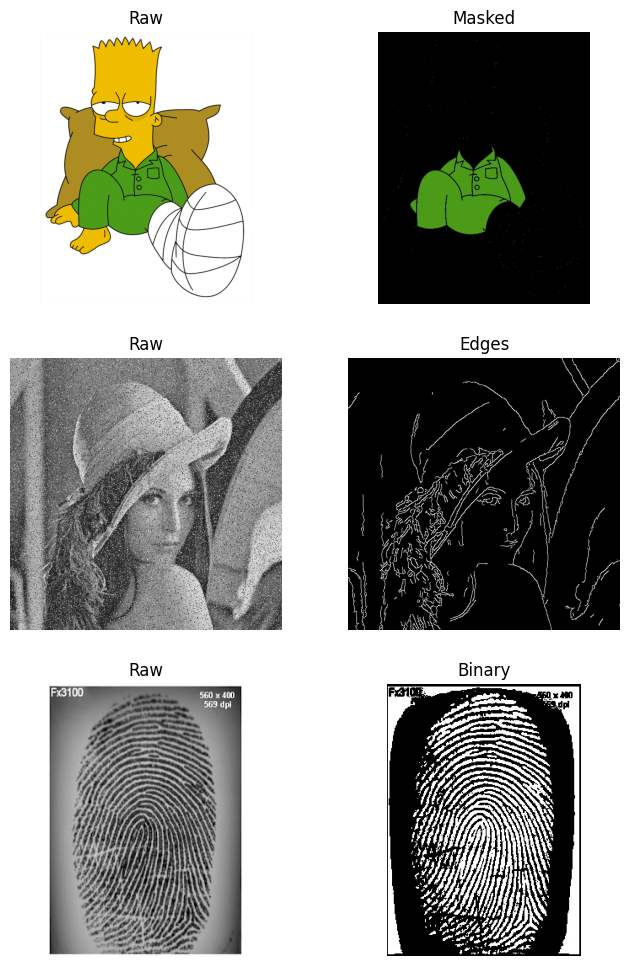

In [5]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

In [10]:
# Convert the image to HSV
hsv = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)

# Define the range of blue color in HSV
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_green, upper_green)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(cartoon, cartoon, mask= mask)

# Convert the result back to RGB
cartoon_y_mentee = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

In [6]:
girl_y_mentee = cv2.erode(girl_y,np.ones((1,1)))

In [4]:
fingerprint_y_mentee = cv2.cvtColor(fingerprint_y,cv2.COLOR_BGR2GRAY)

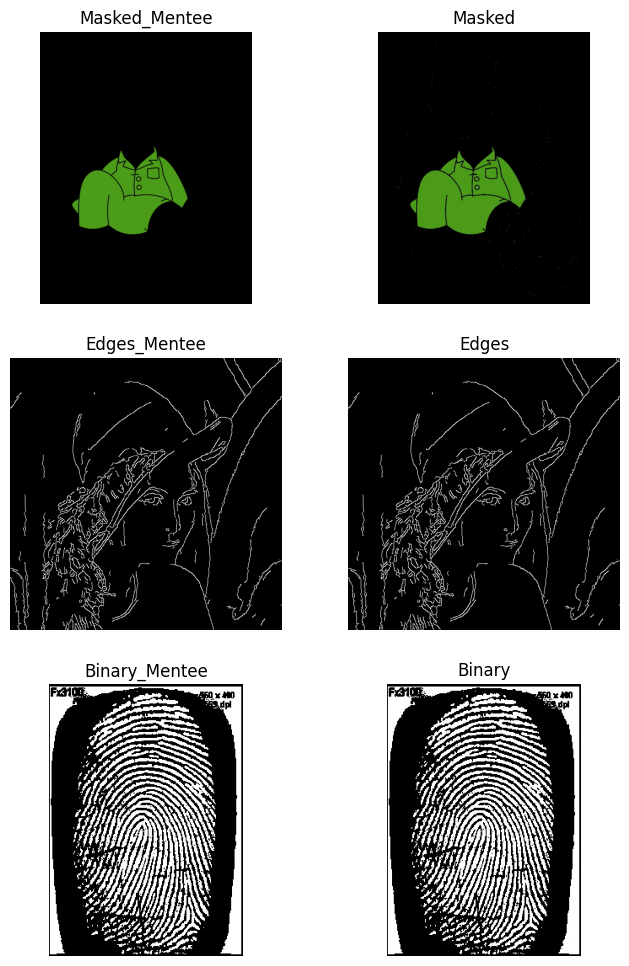

In [11]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()